# <span style="color: blue;">Import the libraries</span>

In [1]:
# !pip install bar_chart_race
# ! pip install ffmpeg-python

In [2]:
import numpy as np
import pandas as pda
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as ply

from collections import Counter

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# <span style="color: blue;">Reading the different input datasets</span>

In [4]:
# Country statistics UN Dataset
df_input_1 = pd.read_csv(r"C://Users/db27898/Documents/CaseStudy/MSD/InputData/Country_profile_variables.csv")
print(df_input_1.shape)

# Country wise GDP dataset
df_input_2 = pd.read_csv(r'C://Users/db27898/Documents/CaseStudy/MSD/InputData/gdp_csv.csv')
print(df_input_2.shape)

# Country socio economic dataset
df_input_3 = pd.read_csv(r"C://Users/db27898/Documents/CaseStudy/MSD/InputData/Country-data.csv")
print(df_input_3.shape)

# UN GDP across the countries
df_input_4 = pd.read_csv(r'C://Users/db27898/Documents/CaseStudy/MSD/InputData/countries.csv')
print(df_input_4.shape)

# Pharmaceutical drug spending across the countries
df_input_5 = pd.read_csv(r'C://Users/db27898/Documents/CaseStudy/MSD/InputData/data_csv.csv')
print(df_input_5.shape)

# Income by Country
df_input_6 = pd.read_excel(r'C://Users/db27898/Documents/CaseStudy/MSD/InputData/Income_by_Country.xlsx')
print(df_input_6.shape)

(229, 50)
(11507, 4)
(167, 10)
(212, 8)
(1036, 7)
(208, 30)


# <span style="color: blue;">Analyzing the datasets: Prelim EDA's</span>

## <span style="color: green;">Dataset 1: Country statistics UN Dataset</span>

In [4]:
df_input_1.head(3)

country          Region Surface area (km2)  \
0  Afghanistan    SouthernAsia             652864   
1      Albania  SouthernEurope              28748   
2      Algeria  NorthernAfrica            2381741   

   Population in thousands (2017)  Population density (per km2, 2017)  \
0                           35530                                54.4   
1                            2930                               106.9   
2                           41318                                17.3   

   Sex ratio (m per 100 f, 2017)  \
0                          106.3   
1                          101.9   
2                          102.0   

   GDP: Gross domestic product (million current US$)  \
0                                              20270   
1                                              11541   
2                                             164779   

  GDP growth rate (annual %, const. 2005 prices)  \
0                                           -2.4   
1                                            2.6   
2                                            3.8   

   GDP per capita (current US$) Economy: Agriculture (% of GVA)  ...  \
0                         623.2                            23.3  ...   
1                        3984.2                            22.4  ...   
2                        4154.1                            12.2  ...   

   Mobile-cellular subscriptions (per 100 inhabitants).1  \
0                                                8.3       
1                                               63.3       
2                                               38.2       

   Individuals using the Internet (per 100 inhabitants)  \
0                                                 42      
1                                                130      
2                                                135      

  Threatened species (number) Forested area (% of land area)  \
0                         2.1                        9.8/0.3   
1                        28.2                        5.7/2.0   
2                         0.8                      145.4/3.7   

  CO2 emission estimates (million tons/tons per capita)  \
0                                                 63      
1                                                 84      
2                                               5900      

  Energy production, primary (Petajoules)  \
0                                       5   
1                                      36   
2                                      55   

  Energy supply per capita (Gigajoules)  \
0                             78.2/47.0   
1                             94.9/95.2   
2                             84.3/81.8   

   Pop. using improved drinking water (urban/rural, %)  \
0                                          45.1/27.0     
1                                          95.5/90.2     
2                                          89.8/82.2     

   Pop. using improved sanitation facilities (urban/rural, %)  \
0                                              21.43            
1                                               2.96            
2                                               0.05            

  Net Official Development Assist. received (% of GNI)  
0                                                -99    
1                                                -99    
2                                                -99    

[3 rows x 50 columns]

In [5]:
df_input_1.country.nunique(), df_input_1.Region.nunique()

(229, 22)

###### Data distributions

<BarContainer object of 22 artists>

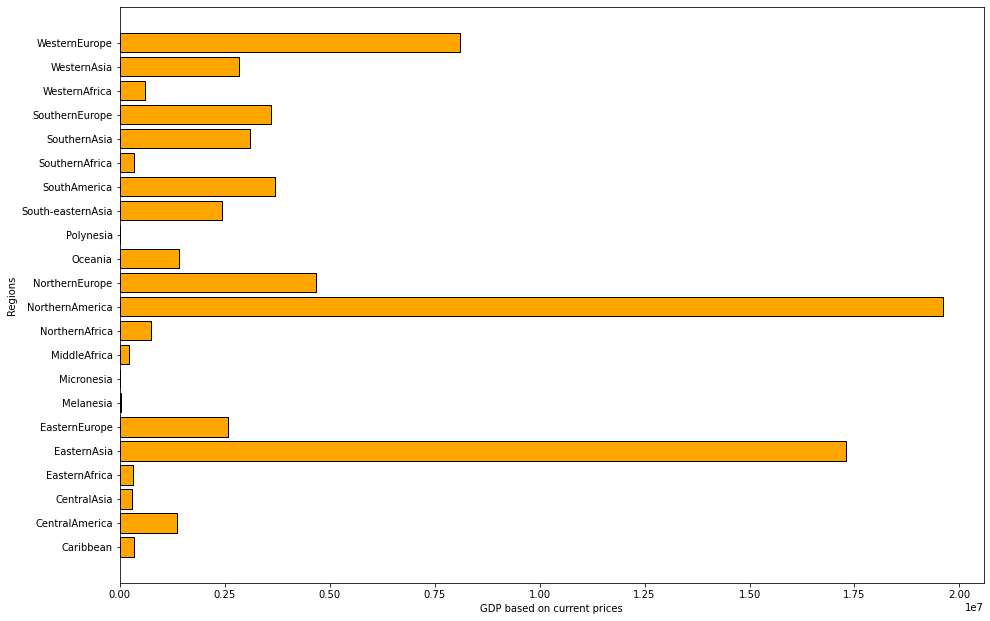

In [6]:
df = df_input_1[df_input_1['GDP: Gross domestic product (million current US$)'] > 0.0]

x = df.groupby('Region')['GDP: Gross domestic product (million current US$)'].sum()
fig = plt.figure()
Regions = []
for i in df['Region'].unique():
    Regions.append(i)
ax = fig.add_axes([0,0,2,2])
plt.ylabel("Regions")
plt.xlabel("GDP based on current prices")
ax.barh(sorted(Regions),x , color ='orange', edgecolor = 'black')

<AxesSubplot:ylabel='Percentage'>

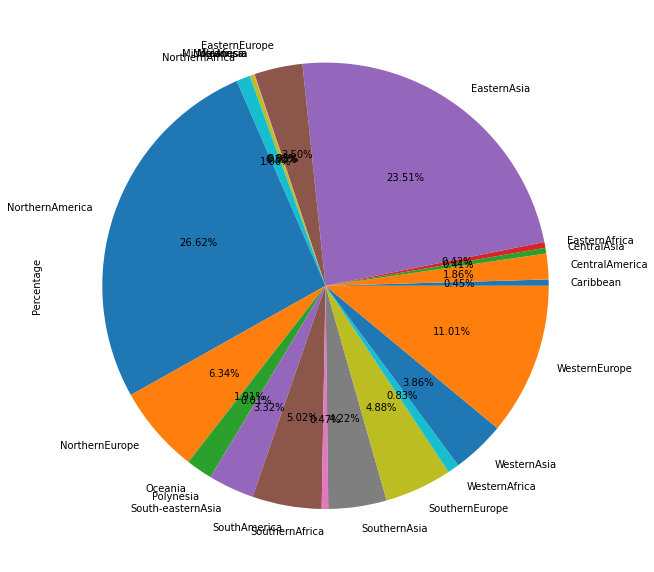

In [7]:
dict = {'Regions' : df['Region'] , 'GDP' :df['GDP: Gross domestic product (million current US$)'] , 'country': df['country']}
df = pd.DataFrame(data = dict)
df.head()

contrib = df.groupby('Regions')['GDP'].sum().round().reset_index()
contrib["Percentage"] = (contrib.GDP/sum(contrib.GDP))*100
contrib = contrib.drop(columns = ["GDP"])
contrib
contrib.plot(kind = "pie",y="Percentage",labels=contrib['Regions'],legend=False,figsize=(10,50),autopct="%.2f%%" )

##### Handling the invalid entries

In [8]:
# Fetching the economical features
addtional_features = df_input_1[['country', 'GDP: Gross domestic product (million current US$)','Economy: Agriculture (% of GVA)','Economy: Industry (% of GVA)','Economy: Services and other activity (% of GVA)','Employment: Agriculture (% of employed)','Employment: Industry (% of employed)','Employment: Services (% of employed)','Unemployment (% of labour force)']]
print(addtional_features.shape)

# Imputations
addtional_features = addtional_features.replace('...', np.nan)
addtional_features = addtional_features.replace(-99, np.nan)
addtional_features = addtional_features.replace('~0.0', 0)
addtional_features.fillna(0, inplace=True)

(229, 9)


##### IQR distributions

In [9]:
# feature space distribution
def display_distribution(data, column) :
  q1 = np.percentile(data[column], 25) 
  q3 = np.percentile(data[column], 75)
  iqr = q3-q1 
  upper_range = q3+(3*iqr)
  lower_range = q1-(3*iqr)
  step = (upper_range - max(data[column].min(), lower_range))/10 #10 buckets
  xticks=[]
  x= max(data[column].min(), lower_range)
  # print(max(data[column].min(), lower_range),upper_range )
  while (x<=upper_range) :
    xticks.append(x)
    x+=step
  plt.figure(figsize=(25,5))
  plt.hist(data[column], bins=10, range=(max(data[column].min(), lower_range) ,upper_range), density=False)
  plt.xticks(xticks, fontsize=15)
  plt.yticks(fontsize=15)
  plt.show()

-------------------------------------------------- GDP: Gross domestic product (million current US$) --------------------------------------------------
GDP: Gross domestic product (million current US$)


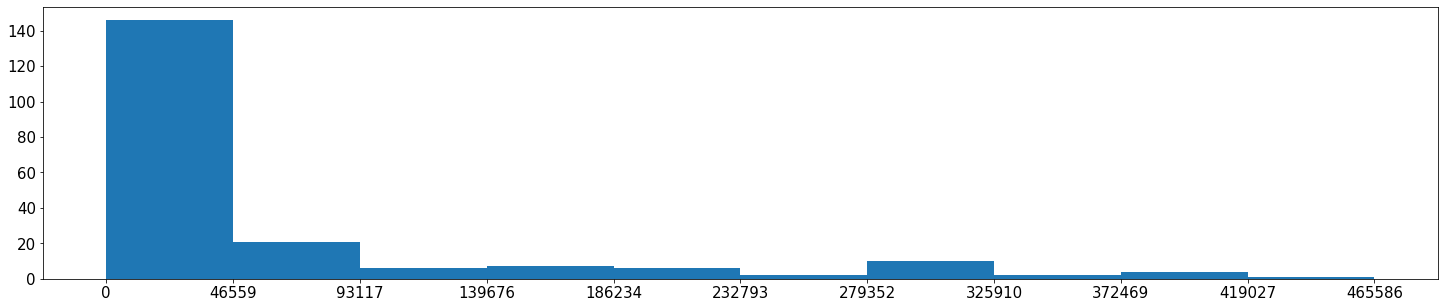

-------------------------------------------------- Economy: Agriculture (% of GVA) --------------------------------------------------
Economy: Agriculture (% of GVA)


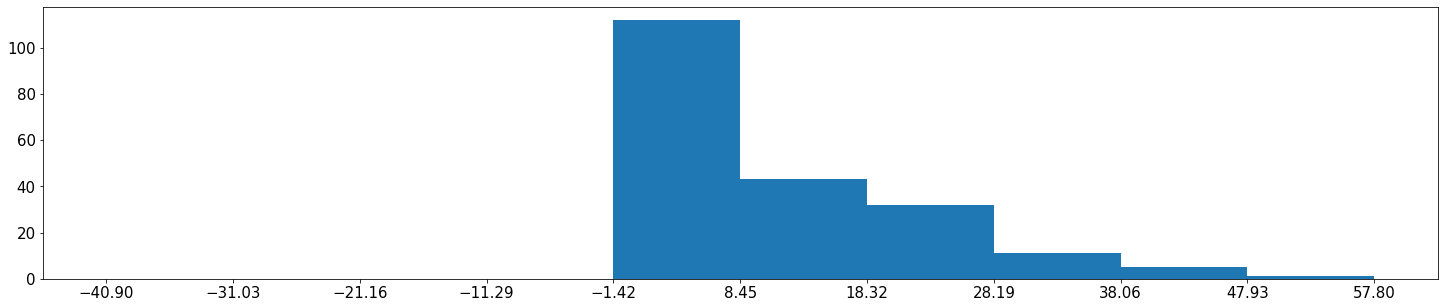

-------------------------------------------------- Economy: Industry (% of GVA) --------------------------------------------------
Economy: Industry (% of GVA)


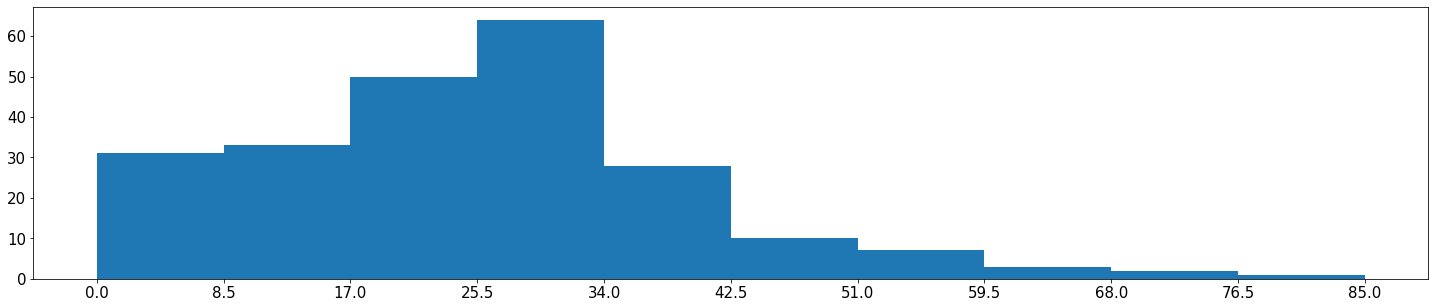

-------------------------------------------------- Economy: Services and other activity (% of GVA) --------------------------------------------------
Economy: Services and other activity (% of GVA)


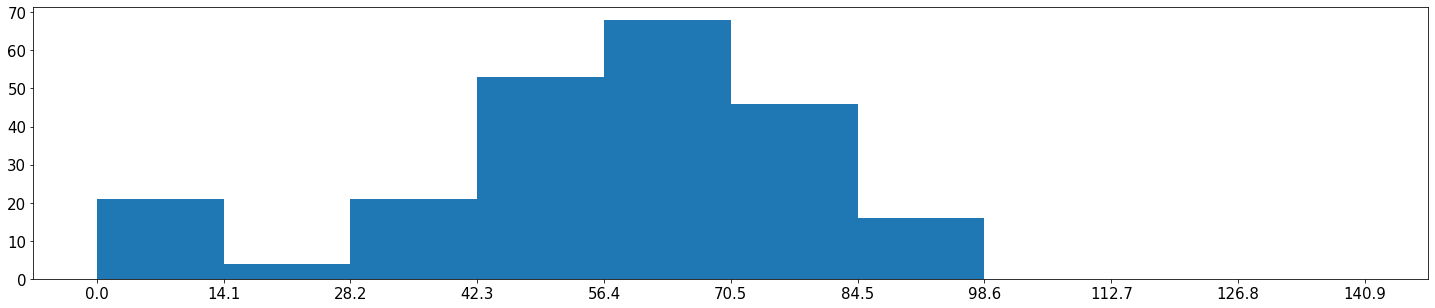

-------------------------------------------------- Employment: Agriculture (% of employed) --------------------------------------------------
Employment: Agriculture (% of employed)


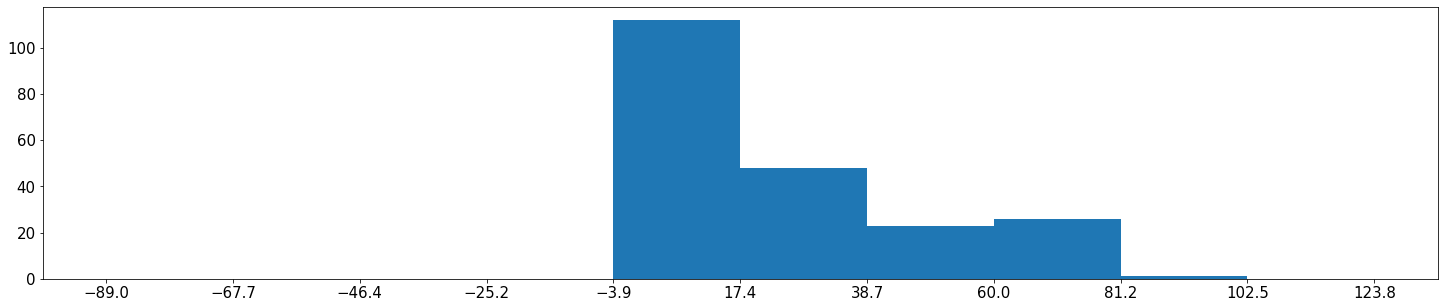

-------------------------------------------------- Employment: Industry (% of employed) --------------------------------------------------
Employment: Industry (% of employed)


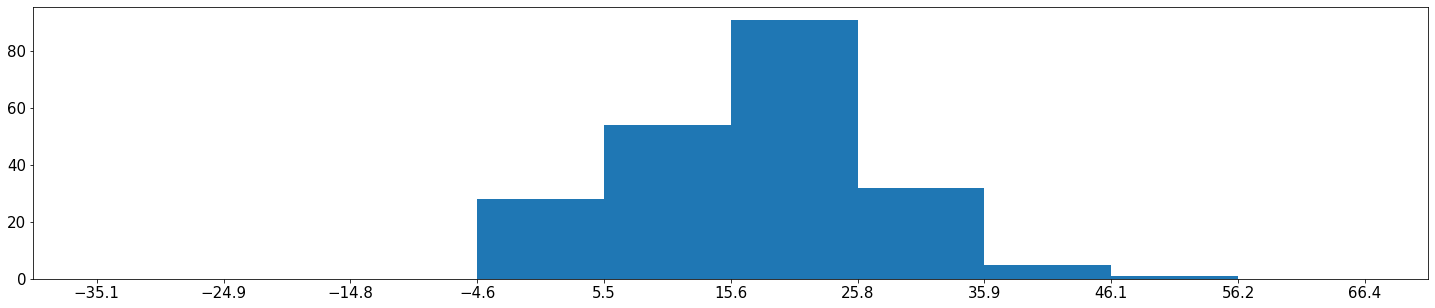

-------------------------------------------------- Employment: Services (% of employed) --------------------------------------------------
Employment: Services (% of employed)


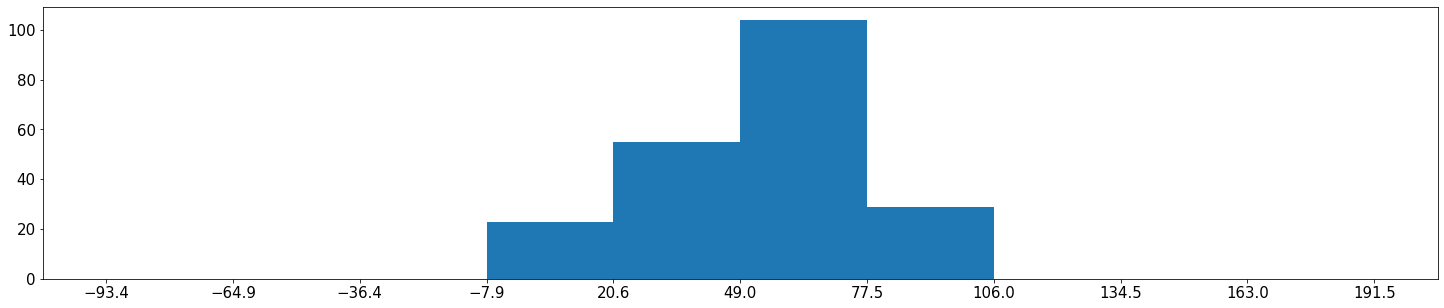

-------------------------------------------------- Unemployment (% of labour force) --------------------------------------------------
Unemployment (% of labour force)


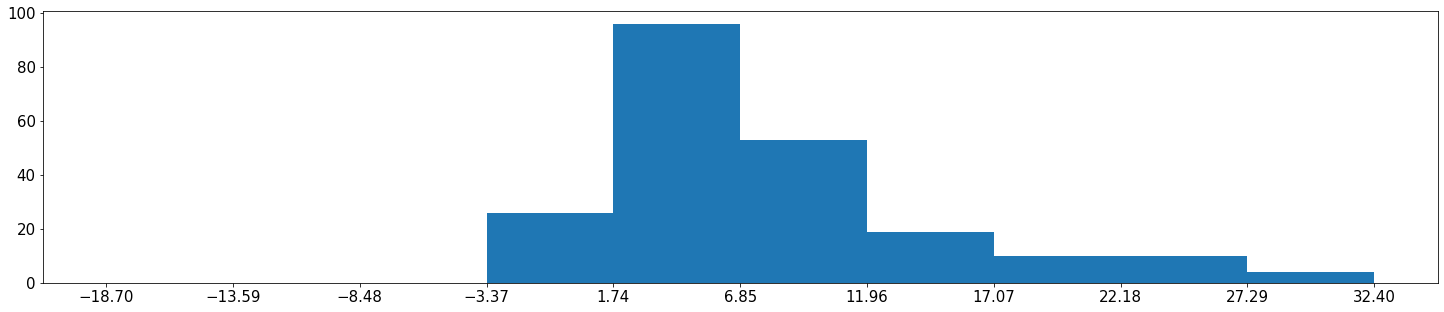

In [10]:
for i in addtional_features.drop(['country'], axis=1).columns:
    addtional_features[i] = addtional_features[i].astype(float)

for col in list(addtional_features.drop(['country'], axis=1).columns) :
  print('-'*50, col, '-'*50)
  print(col)
  display_distribution(addtional_features, col)

## <span style="color: green;">Dataset 2: Global GDP Dataset</span>

In [11]:
df_input_2.head(3)

Country Name Country Code  Year         Value
0   Arab World          ARB  1968  2.576068e+10
1   Arab World          ARB  1969  2.843420e+10
2   Arab World          ARB  1970  3.138550e+10

##### Growth rate of GDP of different countries

In [12]:
ply.scatter(data_frame= df_input_2,
           x= "Year",
           y="Value",
           color="Country Name", 
           hover_name="Country Name",
           log_y=False)

## <span style="color: green;">Dataset 3: Country socio economic dataset</span>

In [13]:
df_input_3.head(3)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   
2      Algeria        27.3     38.4    4.17     31.4   12900      16.10   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090  
2        76.5       2.89  4460

##### IQR analysis of the different features

-------------------------------------------------- child_mort --------------------------------------------------
child_mort


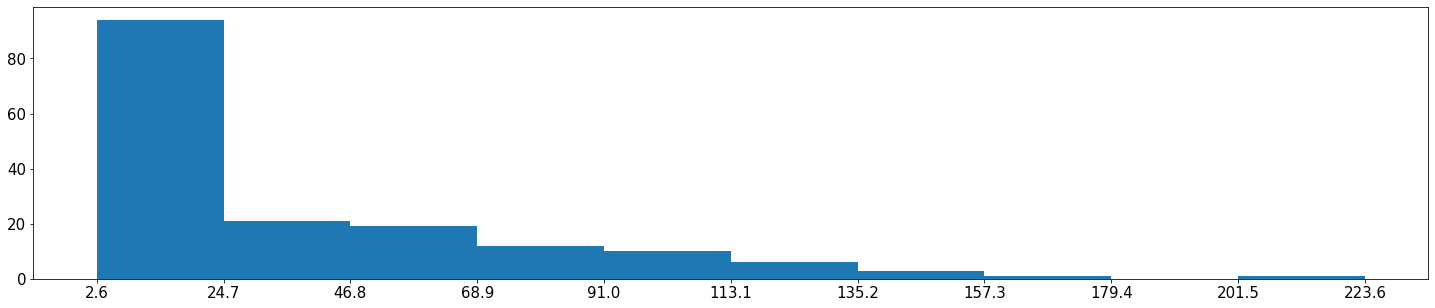

-------------------------------------------------- exports --------------------------------------------------
exports


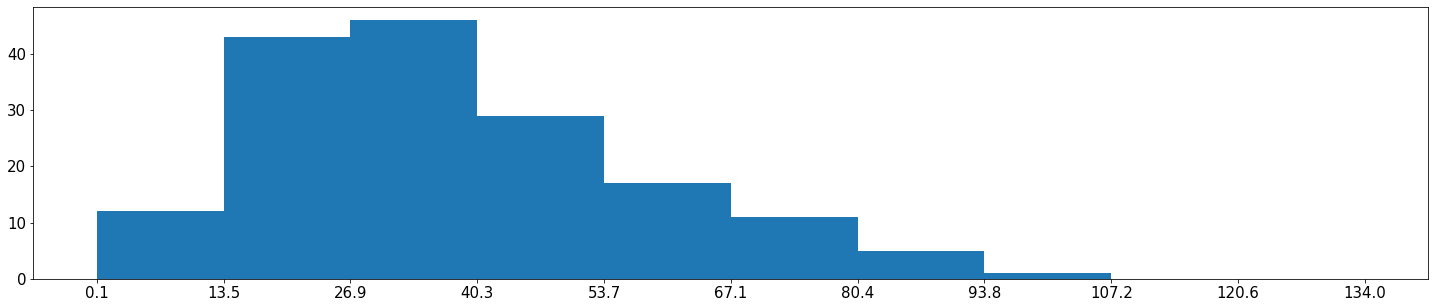

-------------------------------------------------- health --------------------------------------------------
health


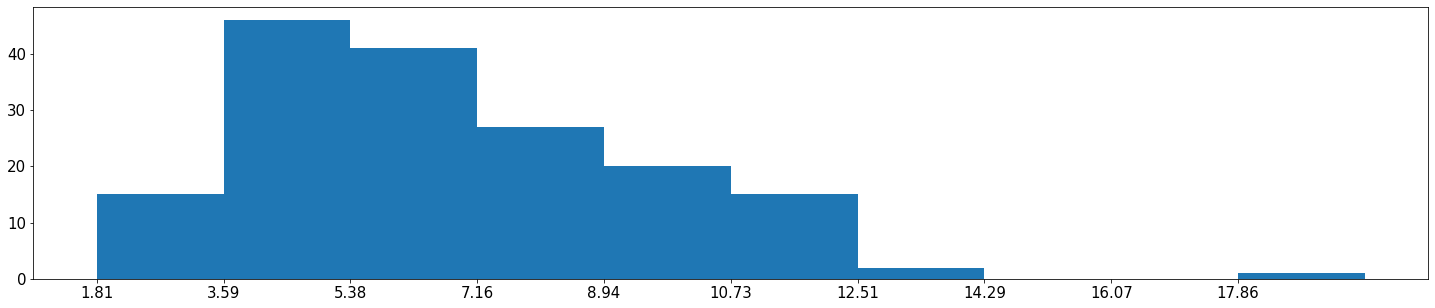

-------------------------------------------------- imports --------------------------------------------------
imports


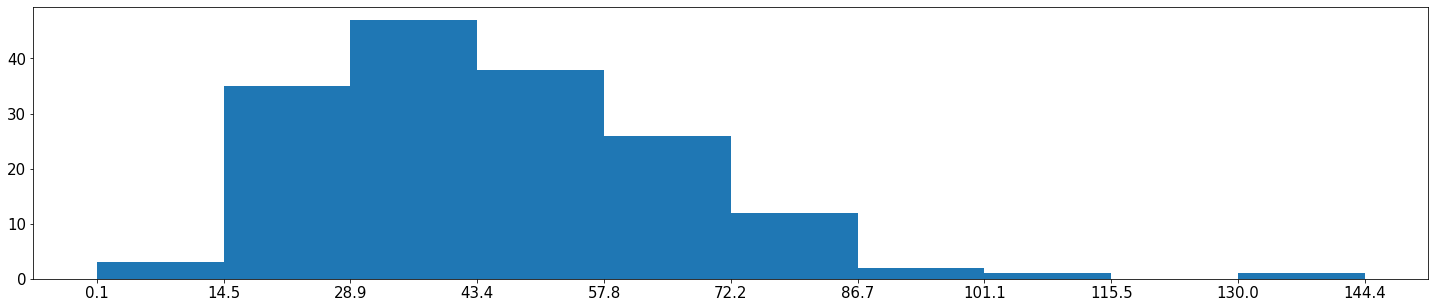

-------------------------------------------------- income --------------------------------------------------
income


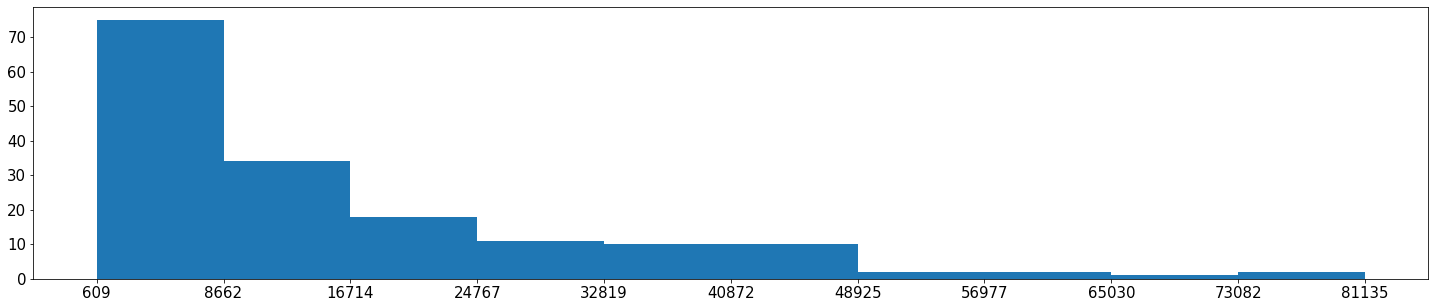

-------------------------------------------------- inflation --------------------------------------------------
inflation


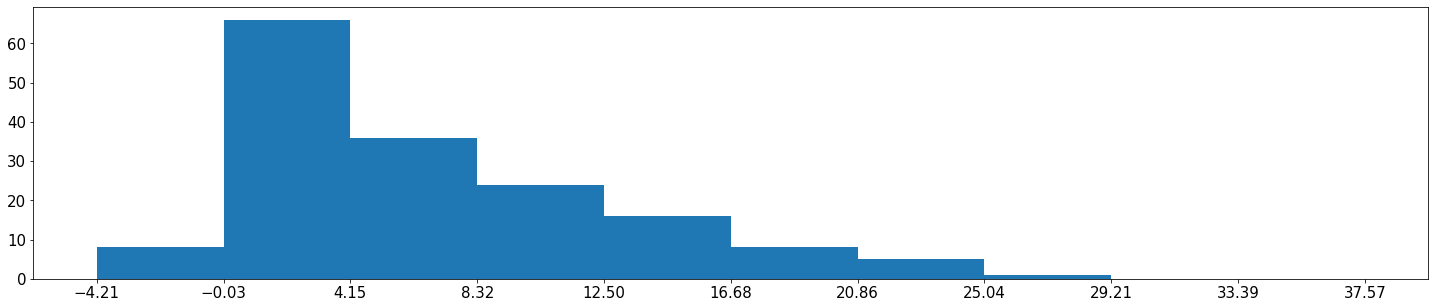

-------------------------------------------------- life_expec --------------------------------------------------
life_expec


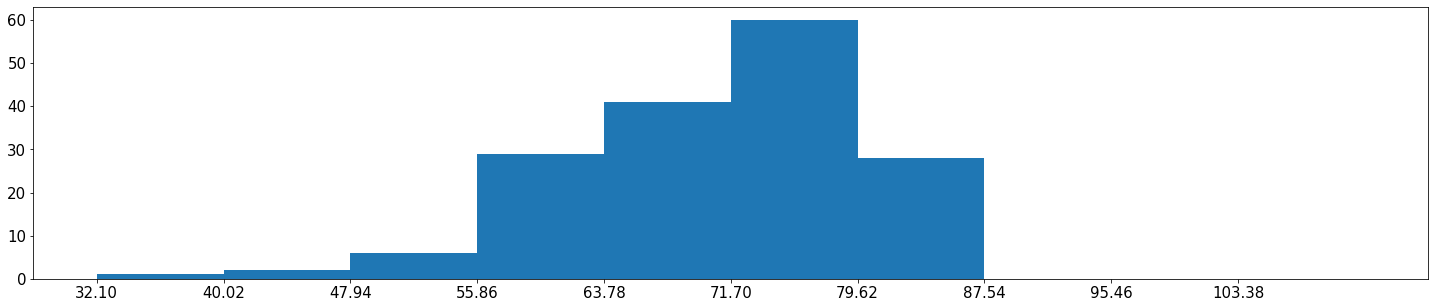

-------------------------------------------------- total_fer --------------------------------------------------
total_fer


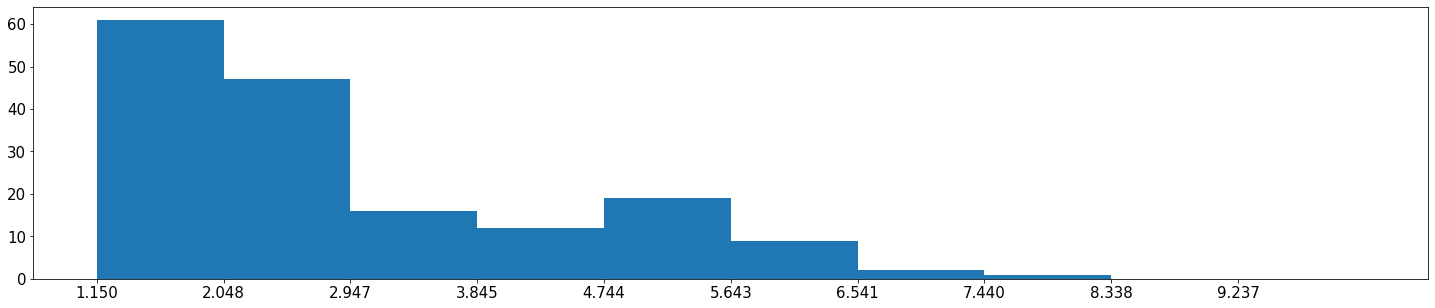

-------------------------------------------------- gdpp --------------------------------------------------
gdpp


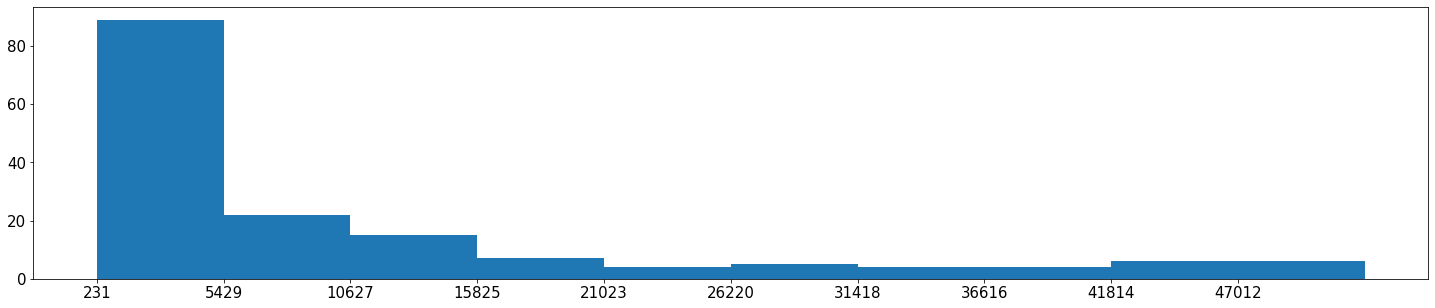

In [14]:
for col in list(df_input_3.drop(['country'], axis=1).columns) :
  print('-'*50, col, '-'*50)
  print(col)
  display_distribution(df_input_3, col)

##### Pair plots

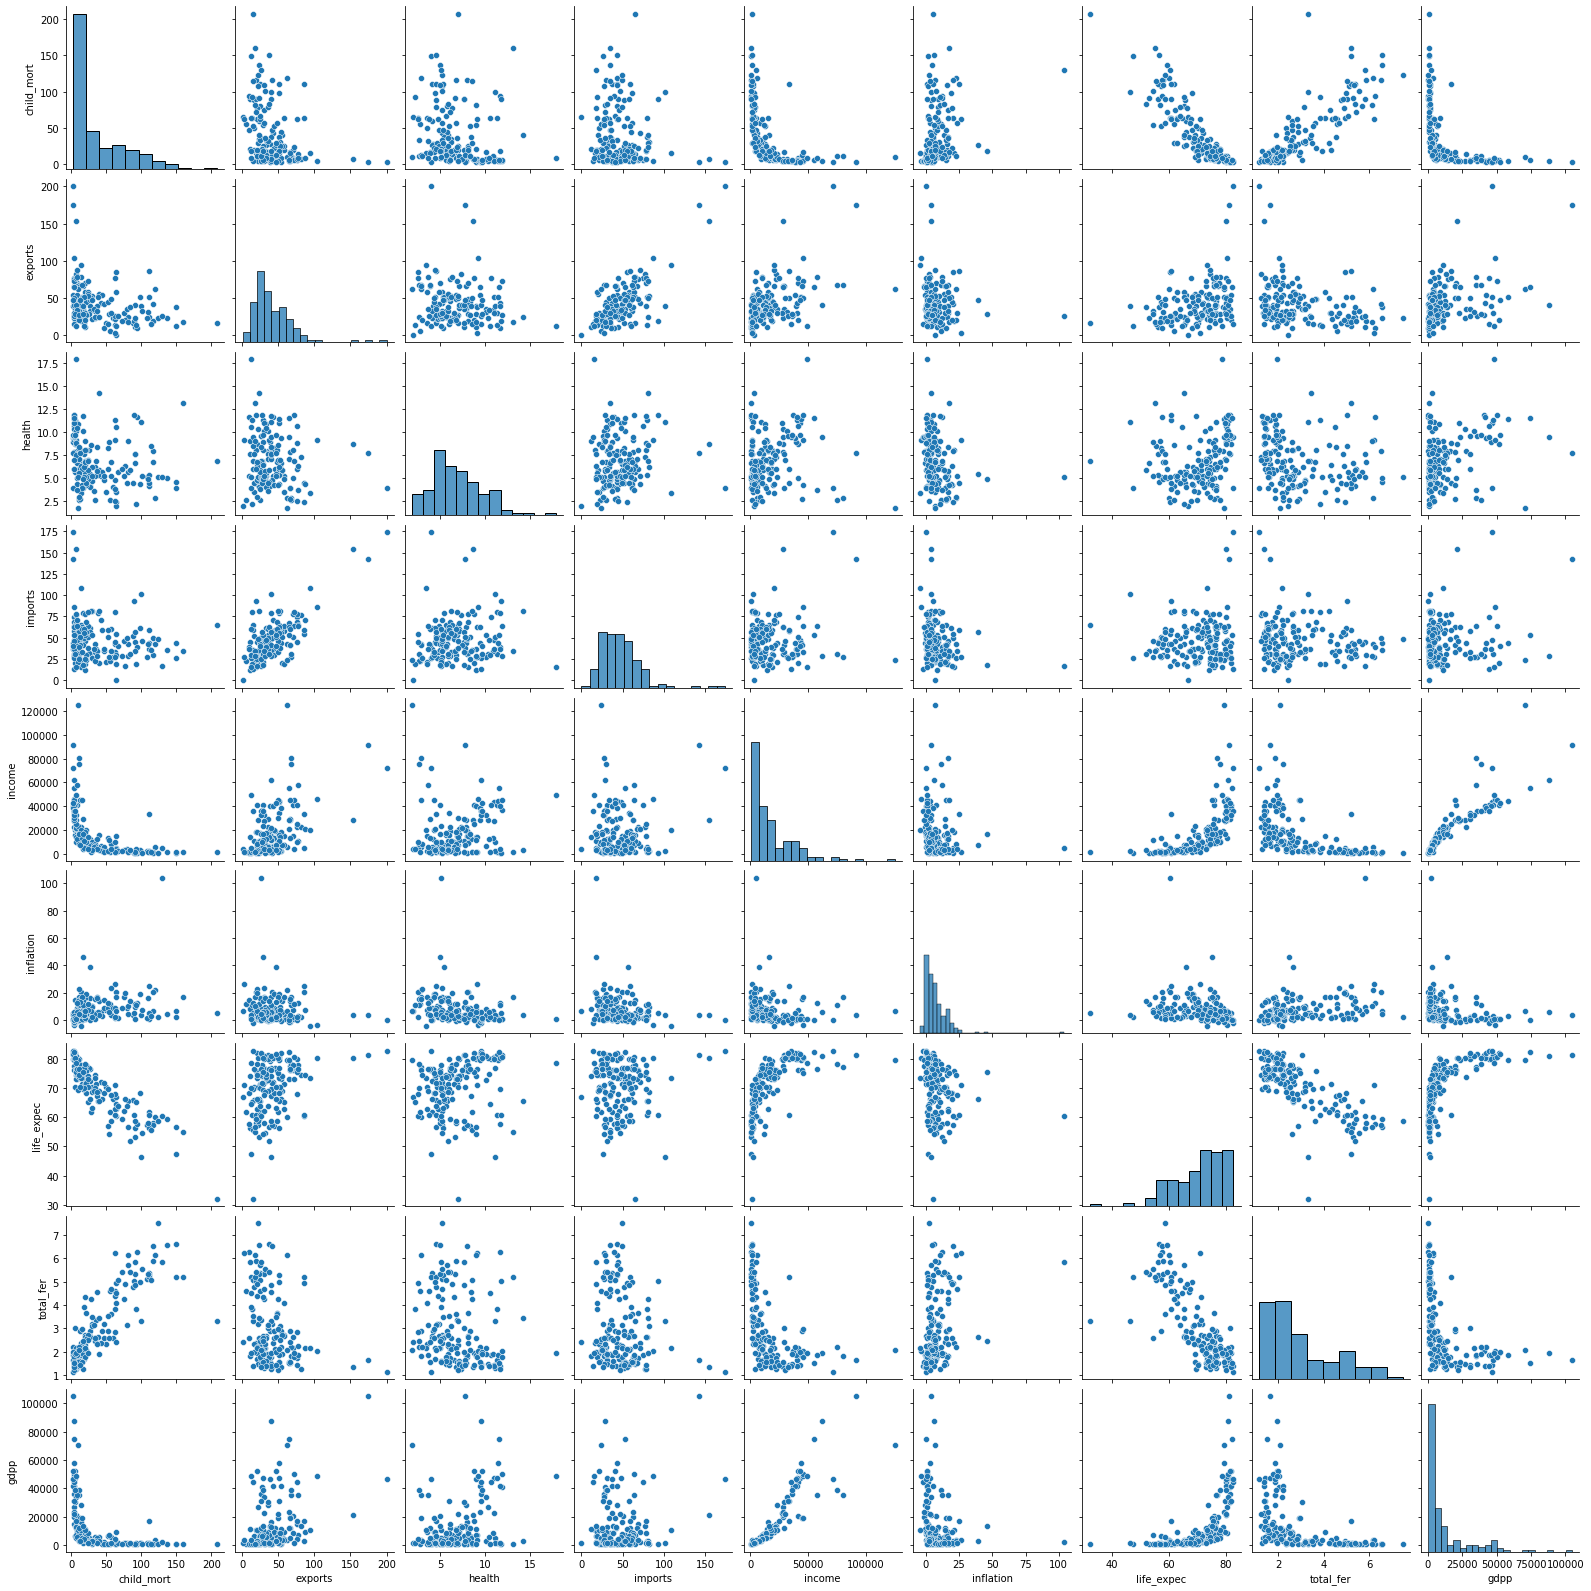

In [15]:
# Create a scatter plot matrix between exports, imports, health, and GDP
sns.pairplot(data=df_input_3, vars=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'])
plt.show()

## <span style="color: green;">Dataset 4: UN GDP across the countries</span>

In [16]:
df_input_4.head(3)

Rank   ID        Country      Continent  Population       IMF_GDP  \
0     1  840  United States  North America   339996.56  2.669515e+13   
1     2  156          China           Asia  1425671.35  2.186548e+13   
2     3  392          Japan           Asia   123294.51  5.291351e+12   

         UN_GDP  GDP_per_capita  
0  1.862448e+13        78515.94  
1  1.121828e+13        15336.97  
2  4.936212e+12        42916.35

##### Analyzing the GDP dataset across the globe

In [17]:
continents = df_input_4['Continent'].unique()

for continent in continents:
    continent_df = df_input_4[df_input_4['Continent'] == continent]
    
    fig = ply.scatter(continent_df, x='IMF_GDP', y='GDP_per_capita',
                 size='Population', color='Country',size_max = 60,
                 hover_name='Country', log_x=True, log_y=True,
                 labels={'IMF_GDP': 'IMF GDP', 'GDP_per_capita': 'GDP per capita'},
                 title=f'IMF GDP vs GDP per capita for {continent} Countries')

    fig.show()

In [18]:
df_continents =  df_input_4.groupby('Continent').agg({
    'Country': 'count',
    'Population': 'sum',
    'IMF_GDP': 'sum',
    'UN_GDP': 'sum',
    'GDP_per_capita': 'mean'
}).reset_index()

fig = ply.scatter(df_continents, x='IMF_GDP', y='GDP_per_capita',
                 size='Population', color='Continent',size_max = 60,
                 hover_name='Continent', log_x=True, log_y=True,
                 labels={'IMF_GDP': 'IMF GDP', 'GDP_per_capita': 'GDP per capita'},
                 title=f'IMF GDP vs GDP per capita for {continent} Countries')

fig.show()

## <span style="color: green;">Dataset 5: Pharmaceutical Drug Spending by countries</span>

In [19]:
df_input_5.head(3)

LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND
0      AUS  1971       15.992   0.727   35.720        NaN       462.11
1      AUS  1972       15.091   0.686   36.056        NaN       475.11
2      AUS  1973       15.117   0.681   39.871        NaN       533.47

In [20]:
df_input_5['LOCATION'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'EST', 'SVN', 'ISR', 'LVA', 'LTU', 'RUS'],
      dtype=object)

###### Pre-process

In [21]:
# Let's first clean the already existing columns
df_clean = df_input_5.drop(columns={'FLAG_CODES'}).astype({'LOCATION': 'category'}).set_index(['LOCATION', 'TIME'])

In [22]:
# Additional column derivations

# Considering that:
# PC_HEALTHXP = drug spending / total healthcare spending
# PC_GDP = drug spending / total GPD = (drug spending / healthcare spending) * (healthcare spending / GDP) = PC_HEALTHXP * (healthcare spending / GDP)
# Thus we can derive the percentage of total healthcare spending as part of the GDP
# PC_HCSpending_GPD = (healthcare spending / GDP) = PC_GDP / PC_HEALTHXP
df_clean["PC_HCSpending_GPD"] = df_clean["PC_GDP"]*100 / df_clean["PC_HEALTHXP"]

# Let's also add the delta between the previous year for the relevant values
# Note that we first have to perform the groupby, else we'll also create the delta between the last TIME of the previous LOCATION and the first TIME of the next LOCATION
for column in ["PC_HEALTHXP", "PC_GDP", "USD_CAP", "TOTAL_SPEND", "PC_HCSpending_GPD"]:
    df_clean["delta_{}".format(column)] = df_clean.groupby('LOCATION').diff()[column]

df_clean.head(3)

PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND  PC_HCSpending_GPD  \
LOCATION TIME                                                                 
AUS      1971       15.992   0.727   35.720       462.11           4.546023   
         1972       15.091   0.686   36.056       475.11           4.545756   
         1973       15.117   0.681   39.871       533.47           4.504862   

               delta_PC_HEALTHXP  delta_PC_GDP  delta_USD_CAP  \
LOCATION TIME                                                   
AUS      1971                NaN           NaN            NaN   
         1972             -0.901        -0.041          0.336   
         1973              0.026        -0.005          3.815   

               delta_TOTAL_SPEND  delta_PC_HCSpending_GPD  
LOCATION TIME                                              
AUS      1971                NaN                      NaN  
         1972              13.00                -0.000267  
         1973              58.36                -0.040894

##### Distribution plot

In [23]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_clean, x=df_clean.index.get_level_values('TIME'), y="PC_HEALTHXP", color=df_clean.index.get_level_values('LOCATION'))
fig.add_trace(go.Scatter(x=df_clean.groupby('TIME').mean().index, y=df_clean.groupby('TIME').mean()["PC_HEALTHXP"], mode='lines', line={'width': 6, 'color': 'black'}, name='Mean'))
fig.show()
# We see fluctuations in the PC_HEALTHXP across the years but on first sight there isn't a direct pattern.
# We had already seen during the pandas_profiling that there was no strong correlation between TIME and PC_HEALTHXP, but it is always best to also look at the graph in case there were periodic patterns, ...

In [24]:
import plotly.express as px
fig = px.scatter(df_clean, y="PC_GDP", x="USD_CAP", color=df_clean.index.get_level_values('LOCATION'))
fig.add_trace(go.Scatter(x=pd.cut(df_clean['USD_CAP'],15, retbins=True)[1], y=df_clean.groupby(pd.cut(df_clean['USD_CAP'],15, retbins=True)[0]).mean()["PC_GDP"], mode='lines', line={'width': 6, 'color': 'black'}, name='Mean'))
fig.show()
# We did see a stronger correlation during the pandas_profiling between PC_HEALTHXP and USD_CAP. We see this returning in below scatter plot

In [25]:
import plotly.express as px
fig = px.scatter(df_clean, y="PC_HEALTHXP", x="USD_CAP", color=df_clean.index.get_level_values('LOCATION'))
fig.add_trace(go.Scatter(x=pd.cut(df_clean['USD_CAP'],15, retbins=True)[1], y=df_clean.groupby(pd.cut(df_clean['USD_CAP'],15, retbins=True)[0]).mean()["PC_HEALTHXP"], mode='lines', line={'width': 6, 'color': 'black'}, name='Mean'))
fig.show()
# However, we do not see the same correlation in PC_HEALTHXP which seems to suggest that if nations spent more per capita on drugs, it is because they spent more on healthcare in general. Thus there is no/little correlation between USD_CAP and PC_HEALTHXP

In [26]:
import plotly.express as px
fig = px.scatter(df_clean, y="PC_HCSpending_GPD", x="USD_CAP", color=df_clean.index.get_level_values('LOCATION'))
fig.add_trace(go.Scatter(x=pd.cut(df_clean['USD_CAP'],15, retbins=True)[1], y=df_clean.groupby(pd.cut(df_clean['USD_CAP'],15, retbins=True)[0]).mean()["PC_HCSpending_GPD"], mode='lines', line={'width': 6, 'color': 'black'}, name='Mean'))
fig.show()
# In below graph you see the HC spending as part of GDP does increase. So an increase in spending per capita is not related to an relative equal increase in GPD, as else we'd not see a correlation (see analysis between PC_HEALTHXP and USD_CAP)

## <span style="color: green;">Dataset 6: Income by country</span>

In [5]:
df_input_6.head(3)

Country   1990   1991   1992   1993   1994   1995   1996   1997   1998  \
0  Afghanistan  0.466   0.44  0.431  0.376  0.328  0.381  0.366  0.354  0.343   
1      Albania  0.572  0.521  0.506  0.526  0.541  0.563  0.578  0.561  0.576   
2      Algeria  0.695  0.687  0.687  0.683  0.677  0.678  0.681  0.681  0.688   

   ...   2009   2010   2011   2012   2013   2014   2015   2016   2017   2018  
0  ...  0.409  0.426  0.421  0.435  0.438  0.436  0.435  0.434  0.434  0.432  
1  ...  0.686  0.693  0.699    0.7  0.705  0.707  0.711  0.717  0.721  0.727  
2  ...  0.731  0.735  0.734  0.734  0.735  0.737  0.739  0.745  0.743  0.743  

[3 rows x 30 columns]

##### Transform the dataset

In [8]:
# Data cleansing, merge GNI
df_input_6 = df_input_6.set_index('Country')

df_input_6 = pd.melt(df_input_6,value_vars=df_input_6.columns, ignore_index=False).reset_index()
df_input_6.columns = ['Country','Year','GNI']
df_input_6.head(3)

Country  Year    GNI
0  Afghanistan  1990  0.466
1      Albania  1990  0.572
2      Algeria  1990  0.695

In [13]:
ply.scatter(data_frame= df_input_6[df_input_6['Country'].isin(['India', 'United Kingdom', 'United States', 'Pakistan', 'Luxembourg', 'Malta', 'Singapore'])],
           x= "Year",
           y="GNI",
           color="Country", 
           hover_name="Country",
           log_y=False)

# <span style="color: blue;">End of code</span>